<a href="https://colab.research.google.com/github/virajyadav/google_colab_experiments/blob/main/Car_Brand_classifier_transfer_learning_cnn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/Datasets.zip

Archive:  /content/Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating: Datase

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
 # useful for getting number of output classes
folders = glob('/content/Datasets/Train/*')

In [7]:
len(folders)

3

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 17s 4s/step - loss: 6.0145 - accuracy: 0.3438 - val_loss: 8.1362 - val_accuracy: 0.2931
Epoch 2/50
2/2 [==============================] - 2s 2s/step - loss: 5.5027 - accuracy: 0.4688 - val_loss: 1.8780 - val_accuracy: 0.2069
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 3.1744 - accuracy: 0.4219 - val_loss: 3.4459 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 6.2045 - accuracy: 0.3281 - val_loss: 6.7658 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 6.7894 - accuracy: 0.3906 - val_loss: 1.8207 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 1.7876 - accuracy: 0.4219 - val_loss: 3.6045 - val_accuracy: 0.1897
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 3.4671 - accuracy: 0.3750 - val_loss: 3.7941 - val_accuracy: 0.1897
Epoch 8/50
2/2 [========================

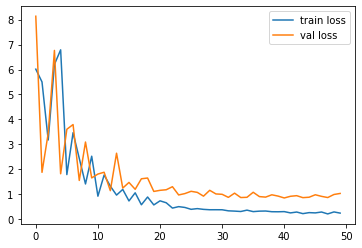

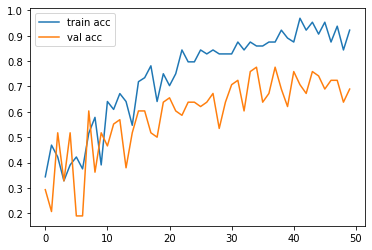

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[2.70189764e-03, 8.87959182e-01, 1.09338909e-01],
       [7.13634491e-03, 8.43068302e-01, 1.49795353e-01],
       [1.36218709e-03, 7.89171904e-02, 9.19720590e-01],
       [1.04388893e-02, 7.58522570e-01, 2.31038541e-01],
       [1.22068357e-02, 9.83648181e-01, 4.14488511e-03],
       [7.23689735e-01, 1.45859390e-01, 1.30450904e-01],
       [3.93701255e-01, 1.00083938e-02, 5.96290350e-01],
       [3.42778396e-03, 9.33278859e-01, 6.32933527e-02],
       [1.99940968e-02, 4.23344560e-02, 9.37671483e-01],
       [4.27738056e-02, 4.97706741e-01, 4.59519506e-01],
       [1.41511112e-01, 2.62013704e-01, 5.96475184e-01],
       [8.56236219e-01, 3.20881791e-02, 1.11675635e-01],
       [2.82971165e-03, 5.29298151e-04, 9.96641040e-01],
       [8.73426646e-02, 1.00761555e-01, 8.11895788e-01],
       [7.32751284e-03, 3.55408370e-01, 6.37264073e-01],
       [4.46622892e-07, 2.79617088e-04, 9.99719918e-01],
       [9.57073048e-02, 8.31630349e-01, 7.26623535e-02],
       [2.40114313e-02, 1.85173

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1,
       2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
model=load_model('model_resnet50.h5')

In [44]:
img=image.load_img('/content/Datasets/Train/mercedes/11.jpg',target_size=(224,224))

In [45]:
x=image.img_to_array(img)

In [46]:
x.shape

(224, 224, 3)

In [47]:
x=x/255 #scalling between 0 to 1

In [48]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

array([[7.6449629e-05, 6.7104644e-05, 9.9985647e-01]], dtype=float32)

In [50]:
a=np.argmax(model.predict(img_data), axis=1)

In [51]:
a==2

array([ True])

In [52]:
a

array([2])